In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score


import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('Train.csv')

In [3]:
train_data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [4]:
train_data.shape

(23856, 18)

In [5]:
train_data.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [6]:
#Checking he unique values in X_12
train_data['X_12'].unique()

array([ 1.,  0.,  3.,  2.,  6., 12.,  4., nan,  5., 11., 90., 20.,  8.,
       16., 30., 10.,  7., 50.,  9., 58., 14., 40., 15., 17.])

In [7]:
train_data.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [8]:
#Imputing X_12 with mean
train_data['X_12'].fillna(train_data['X_12'].mean(), inplace=True)

In [9]:
train_data.isnull().any()

INCIDENT_ID         False
DATE                False
X_1                 False
X_2                 False
X_3                 False
X_4                 False
X_5                 False
X_6                 False
X_7                 False
X_8                 False
X_9                 False
X_10                False
X_11                False
X_12                False
X_13                False
X_14                False
X_15                False
MULTIPLE_OFFENSE    False
dtype: bool

In [10]:
train_data['X_12'] = train_data['X_12'].astype('int64')
print(train_data['X_12'].dtype)

int64


In [11]:
#Checking the Distribution of target variable 
# 0 is non hacked and 1 is hacked 
train_data['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

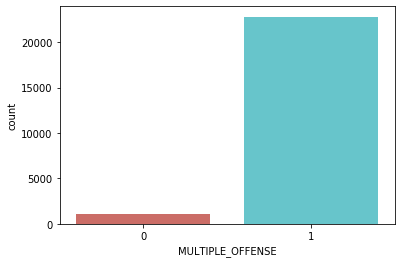

In [12]:
sns.countplot(x = 'MULTIPLE_OFFENSE', data = train_data, palette=  'hls')
plt.show()

In [13]:
#Train and test dataset
X = train_data.drop(['INCIDENT_ID', 'DATE', 'MULTIPLE_OFFENSE'], axis=1)
y = train_data['MULTIPLE_OFFENSE']

In [14]:
# split data into train and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19084, 15)
(19084,)
(4772, 15)
(4772,)


In [15]:
# Modeling the data as is
# Train model
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

In [16]:
accuracy_score(y_test, lr_pred)

0.9587175188600168

In [17]:
# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

1    4723
0      49
Name: 0, dtype: int64

In [18]:
f1_score(y_test, lr_pred)


0.9787784121512442

In [19]:
#confusion matrix
pd.DataFrame(confusion_matrix(y_test, lr_pred))


,0,1
0,32,180
1,17,4543


In [20]:
recall_score(y_test, lr_pred)

0.9962719298245614

In [21]:
from sklearn.ensemble import RandomForestClassifier


In [22]:
# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

accuracy_score(y_test, rfc_pred)

0.9888935456831517

In [23]:
# f1 score
f1_score(y_test, rfc_pred)

0.9942032155747567

In [24]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, rfc_pred))

,0,1
0,174,38
1,15,4545


In [25]:
# recall score
recall_score(y_test, rfc_pred)

0.9967105263157895

In [26]:
import imblearn
from imblearn.over_sampling import SMOTE

In [28]:
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [39]:
smote = XGBClassifier(learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=5,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=2).fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking recall
recall_score(y_test, smote_pred)

0.9991228070175439

# Building the XGBoost Model

In [ ]:
xg = xgb.XGBClassifier()

In [ ]:
xg.fit(X_train,y_train)

In [ ]:
pred = xg.predict(X_test)

# PREDICTION ON TEST DATASET

In [40]:
test_data = pd.read_csv('Test.csv')

In [41]:
test_data['X_12'].fillna(test_data['X_12'].mean(), inplace=True)

In [42]:
y_pred_test = smote.predict(test_data.drop(['INCIDENT_ID', 'DATE'], axis=1))
y_pred_test[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
# # # create submission file
sub = pd.DataFrame()
sub['INCIDENT_ID'] = test_data['INCIDENT_ID']
sub['MULTIPLE_OFFENSE'] = y_pred_test
sub.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [44]:
sub.to_csv('submission9.csv', float_format='%.8f', index=False)